All unique dates:
date
2019-10-21    [2019-10-21T00:00:00.000000000]
2019-10-22    [2019-10-22T00:00:00.000000000]
2019-10-27    [2019-10-27T00:00:00.000000000]
2019-10-29    [2019-10-29T00:00:00.000000000]
2019-10-31    [2019-10-31T00:00:00.000000000]
Name: date, dtype: object

[[0.4        0.375      0.         0.18518519 0.08333333]
 [0.6        0.625      0.         0.33333333 0.33333333]
 [0.8        0.625      0.         0.59259259 0.66666667]
 [1.         1.         0.33333333 0.81481481 0.75      ]
 [1.         1.         1.         0.96296296 1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]]


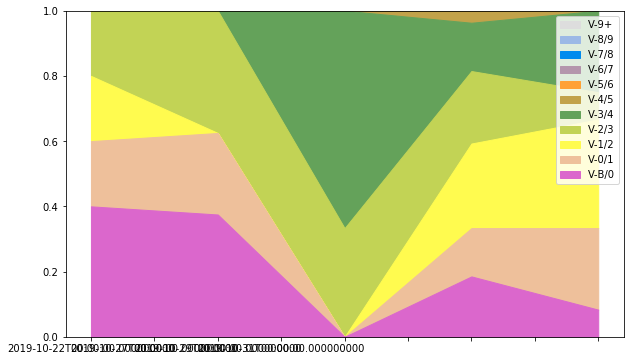

In [173]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from datetime import datetime
import urllib.request
import pandas as pd

def coloravg(c1,c2):
    rgb0 = mcolors.colorConverter.to_rgb(c1)
    rgb1 = mcolors.colorConverter.to_rgb(c2)
    rgb = [np.sqrt((rgb0[i]**2 + rgb1[i]**2)/2) for i in range(3)]
    return rgb

levels = {
    "0": {"name":"V-B/0", "colors":["#db67cc","#db67cc"]},
    "0.5": {"name":"V-0/1", "colors":["#db67cc","#FFFB4F"]},
    "1.5": {"name":"V-1/2", "colors":["#FFFB4F","#FFFB4F"]},
    "2.5": {"name":"V-2/3", "colors":["#FFFB4F","#64A25A"]},
    "3.5": {"name":"V-3/4", "colors":["#64A25A","#64A25A"]},
    "4.5": {"name":"V-4/5", "colors":["#64A25A","#FFA135"]},
    "5.5": {"name":"V-5/6", "colors":["#FFA135","#FFA135"]},
    "6.5": {"name":"V-6/7", "colors":["#FFA135","#008BEE"]},
    "7.5": {"name":"V-7/8", "colors":["#008BEE","#008BEE"]},
    "8.5": {"name":"V-8/9", "colors":["#008BEE","#dddddd"]},
    "9.5": {"name":"V-9+", "colors":["#dddddd","#dddddd"]},
}

urllib.request.urlretrieve("http://kylemills.ca/climbing/dump.php?u=kmills&report_id=1&y=6", '/tmp/out.txt')
str2date = lambda x: (datetime.strptime(x.decode(),'%Y-%m-%d')-datetime(1970,1,1)).total_seconds() 
df = pd.read_csv("/tmp/out.txt")
df['date']= pd.to_datetime(df['date']) 

dates = df.groupby(['date'])['date'].unique()
print("All unique dates:")
print(dates)
print("")

counts_by_level = []

for l in levels:
    this_level = []
    for date in dates:
        level_totals_today = []
        nf = df[
            (df['attempt']==0) & 
            (df['date']==date[0]) & 
            (df['level']==float(l))
        ]['count'].sum()
        this_level.append(nf)
    counts_by_level.append(this_level)

counts_by_level = np.array(counts_by_level)

fig, ax = plt.subplots(1,1,figsize=(10,6))


frac_by_level = counts_by_level / np.sum(counts_by_level, axis=0)
cum_by_level = np.cumsum(frac_by_level, axis=0)

print(cum_by_level)

ls_ = reversed(list(levels.keys()))
is_ = reversed(list(range(len(list(levels.keys())))))


for l, i in zip(ls_, is_):

    
    if i==0:
        ax.fill_between(range(len(dates)),
                        cum_by_level[i,:],
                        np.zeros_like(cum_by_level[i,:]),
                        color=coloravg(*levels[l]["colors"]),
                        label=levels[l]['name'],
                         )
    else:
        ax.fill_between(range(len(dates)),
                        cum_by_level[i,:],
                        cum_by_level[i-1,:], 
                        color=coloravg(*levels[l]["colors"]),
                        label=levels[l]['name'],
                       )

    #plt.plot(dates, counts_by_level[i,:], label=levels[l]['name'], , linestyle=levels[l].get("style","-"))
ax.set_xticklabels([str(i[0]) for i in dates])
ax.set_ylim([0,1])
ax.legend()
fig.show()








# fig, ax = plt.subplots(1,1,figsize=(10,6))
# for i, l in enumerate(levels):
#     if i==0:
#         ax.bar(range(len(dates)), counts_by_level[i,:], color=levels[l]['color'],label=levels[l]['name'] )
#     else:
#         ax.bar(range(len(dates)), counts_by_level[i,:], bottom=counts_by_level[i-1,:], color=levels[l]['color'], label=levels[l]['name']) 
        
#     #plt.plot(dates, counts_by_level[i,:], label=levels[l]['name'], , linestyle=levels[l].get("style","-"))
# ax.set_xticklabels([str(i[0]) for i in dates])
# ax.legend()
# fig.show()

    
